In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

Importing required lib
 

In [0]:
data1=load_iris()

loading  iris_data set

In [0]:
y=pd.DataFrame(data1.target)
x=pd.DataFrame(data1.data)
x.rename(columns = {0: "SepalLengthCm", 
                    1:"SepalWidthCm",
                    2:"PetalLengthCm",
                    3:"PetalWidthCm"},
                     inplace = True)
y.rename(columns ={0:"target"},inplace=True)
data=pd.concat([x,y],axis=1)

In [26]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
SepalLengthCm,1.000000,-0.117570,0.871754,0.817941,0.782561
SepalWidthCm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLengthCm,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidthCm,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


correlation


# Basic visualization


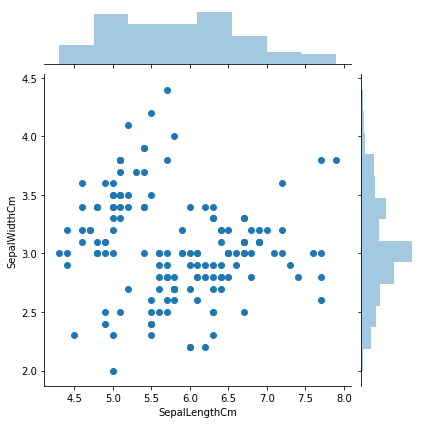

In [29]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data)

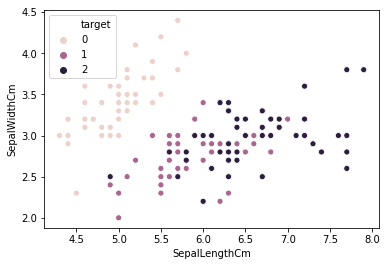

In [30]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data,
                hue='target')

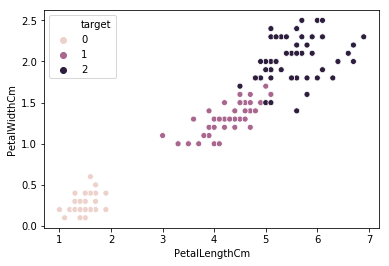

In [31]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data,
                hue='target')

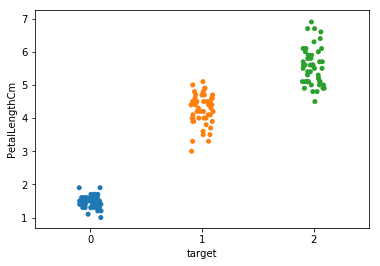

In [32]:
ax = sns.stripplot(x="target", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray")

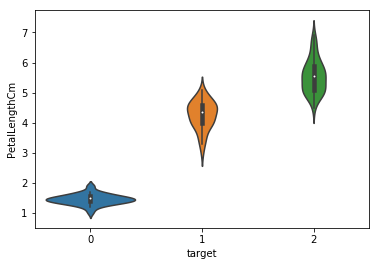

In [33]:
sns.violinplot(x="target", y="PetalLengthCm", data=data, size=6)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
target           150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


# Dividing data set to train and test

In [0]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# Machine Learning Modeling

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_val=GradientBoostingClassifier( n_estimators=50,max_depth=2,random_state=23)



In [37]:
cross_val_score(gbc_val,X_train,y_train,cv=4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

array([0.96774194, 0.9       , 1.        , 0.86206897])

In [38]:
gbc_val.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=23, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
gbc_val.score(X_train,y_train)

1.0

In [40]:
gbc_val.score(X_test,y_test)

0.9333333333333333

# Saving model in pickle format 


In [0]:
from sklearn.externals import joblib 

In [42]:
joblib.dump(gbc_val, 'model.pkl') 

['model.pkl']

# In next step we'll learn to deploy this model 

# Go to >> https://github.com/yogeshkaw/Flower-prediction-Machine-Learning-with-Flusk